In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing

In [353]:
df = pd.read_csv('parsed.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [354]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'heating_type'], inplace=True)
df = df.drop_duplicates()
df_clean = df.dropna(thresh=3)  

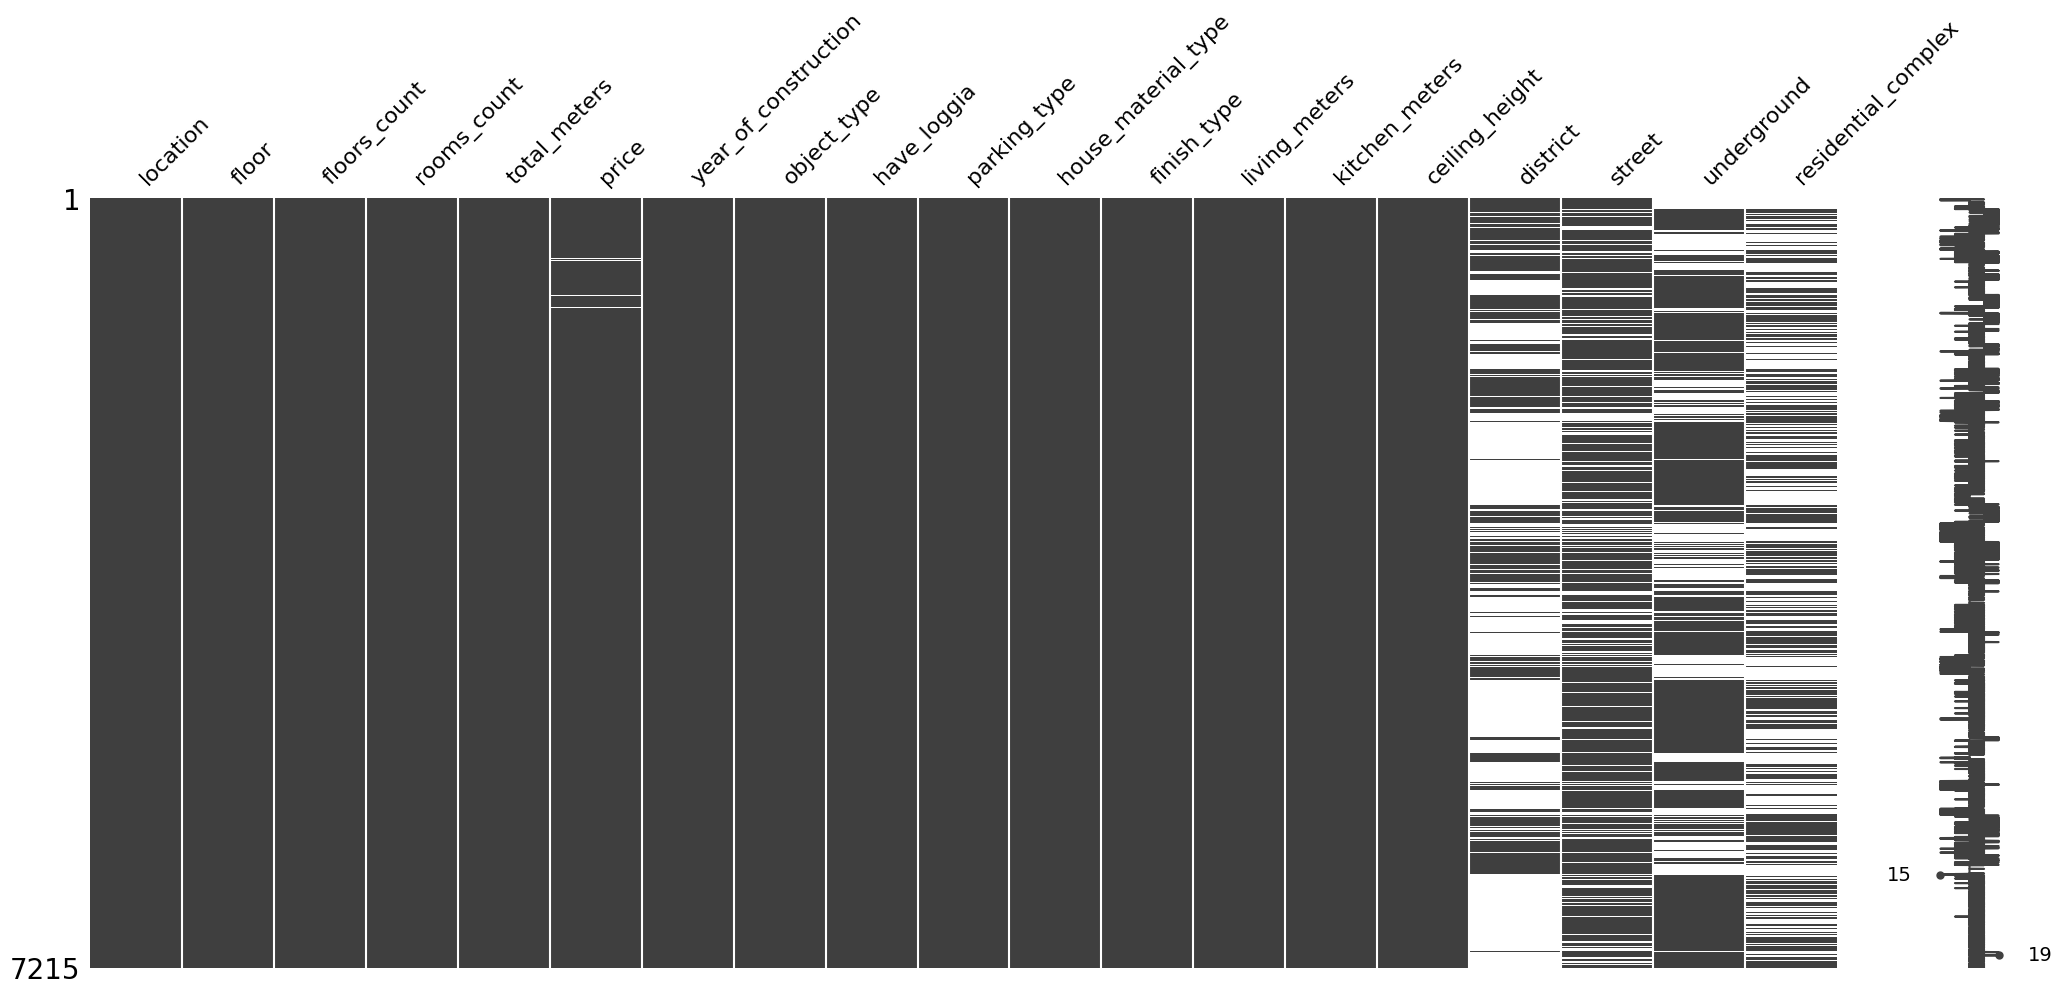

<Figure size 1000x500 with 0 Axes>

In [355]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [356]:
for column in df_clean.columns:
    df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\1697200407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)


In [357]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,-1,-1,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,-1,Наземная,-1,-1,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,-1,Наземная,-1,-1,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,-1,-1,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


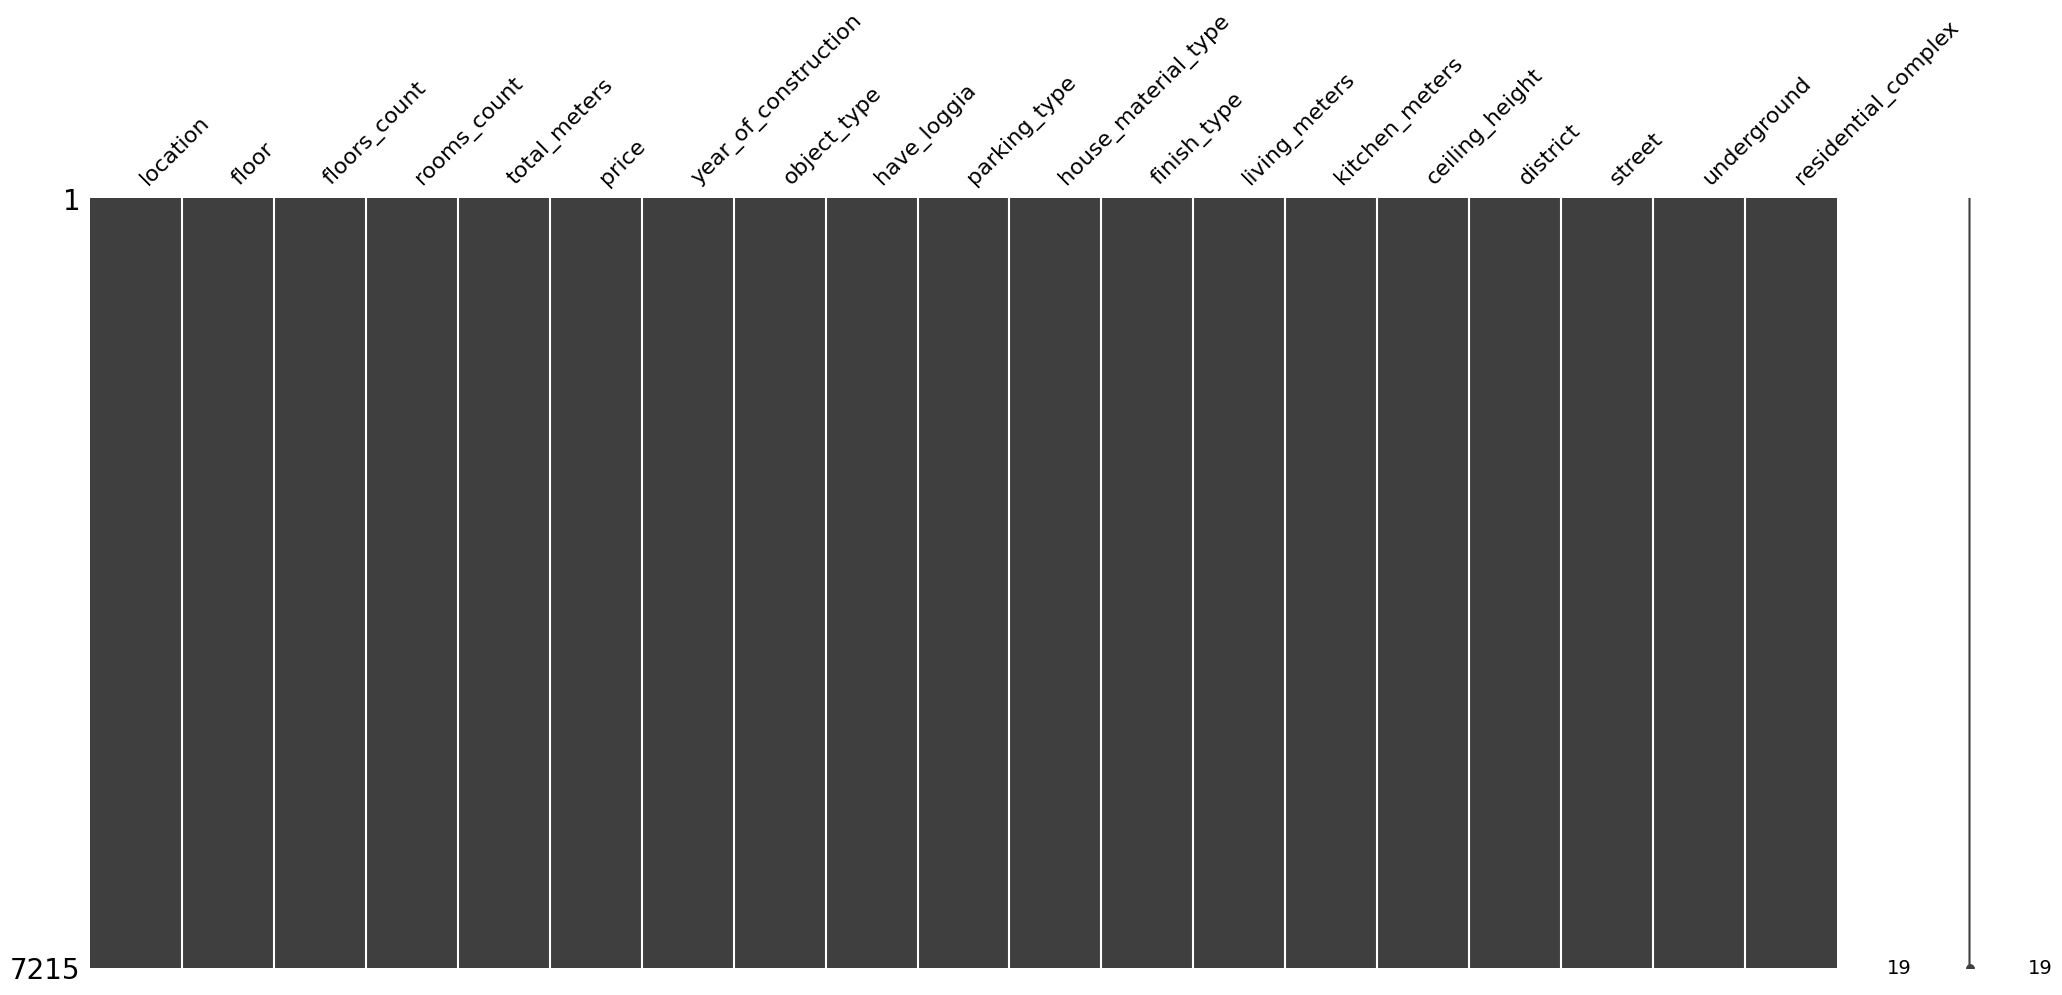

<Figure size 1000x500 with 0 Axes>

In [358]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [359]:
df_clean['floor'].unique()

array(['6', '1', '4', '5', '2', '3', '15', '8', '7', '9', '18', '13',
       '10', '11', '35', '22', '12', '20', '14', '19', '37', '24', '28',
       '17', '34', '16', '40', '21', '41', '30', '33', '29', '23', '25',
       '26', '75', '62', '31', '46', '48', '80', '53', '38', '27', '57',
       '59', '32', '36', '47', '82', '39', '79', 'floor', '66', '60',
       '51'], dtype=object)

In [360]:
df_clean['floor'] = df_clean['floor'].replace('floor', '3')

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\1059912286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].replace('floor', '3')


In [361]:

df_clean['floor'] = df_clean['floor'].astype('int64')

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\3602364599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].astype('int64')


In [362]:
df_clean['floor'].unique()

array([ 6,  1,  4,  5,  2,  3, 15,  8,  7,  9, 18, 13, 10, 11, 35, 22, 12,
       20, 14, 19, 37, 24, 28, 17, 34, 16, 40, 21, 41, 30, 33, 29, 23, 25,
       26, 75, 62, 31, 46, 48, 80, 53, 38, 27, 57, 59, 32, 36, 47, 82, 39,
       79, 66, 60, 51], dtype=int64)

In [363]:
df_clean['floors_count'].unique()

array(['6', '9', '4', '5', '7', '3', '2', '17', '10', '24', '1', '14',
       '18', '12', '23', '20', '41', '21', '43', '8', '59', '40', '27',
       '15', '13', '16', '22', '29', '25', '30', '49', '31', '39', '53',
       '28', '85', '35', '26', '32', '34', '57', '19', '11', '36', '68',
       '38', '51', '78', '79', '47', '33', '64', '75', '45', '37', '63',
       '95', '52', '54', '77', '46', '44', '67', '50', '48', '76', '42',
       '55', '56', '97', '65', 'floors_count', '66'], dtype=object)

In [364]:
df_clean['floors_count'].unique()

df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))

df_clean['floors_count'] = df_clean['floors_count'].astype(float)

mean_value = df_clean['floors_count'].mean()

df_clean['floors_count'] = df_clean['floors_count'].fillna(mean_value)

df_clean['floors_count'] = df_clean['floors_count'].astype('int64')

df_clean['floors_count'].unique()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2363612590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2363612590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = df_clean['floors_count'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2363612590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

array([ 6,  9,  4,  5,  7,  3,  2, 17, 10, 24,  1, 14, 18, 12, 23, 20, 41,
       21, 43,  8, 59, 40, 27, 15, 13, 16, 22, 29, 25, 30, 49, 31, 39, 53,
       28, 85, 35, 26, 32, 34, 57, 19, 11, 36, 68, 38, 51, 78, 79, 47, 33,
       64, 75, 45, 37, 63, 95, 52, 54, 77, 46, 44, 67, 50, 48, 76, 42, 55,
       56, 97, 65, 66], dtype=int64)

In [365]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,-1,-1,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,-1,Наземная,-1,-1,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,-1,Наземная,-1,-1,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,-1,-1,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


In [366]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8392
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7215 non-null   object
 1   floor                 7215 non-null   int64 
 2   floors_count          7215 non-null   int64 
 3   rooms_count           7215 non-null   object
 4   total_meters          7215 non-null   object
 5   price                 7215 non-null   object
 6   year_of_construction  7215 non-null   object
 7   object_type           7215 non-null   object
 8   have_loggia           7215 non-null   object
 9   parking_type          7215 non-null   object
 10  house_material_type   7215 non-null   object
 11  finish_type           7215 non-null   object
 12  living_meters         7215 non-null   object
 13  kitchen_meters        7215 non-null   object
 14  ceiling_height        7215 non-null   object
 15  district              7215 non-null   objec

In [367]:
df_clean['rooms_count'].unique()

df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype(int)

df_clean['rooms_count'].unique()



C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\3361046204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\3361046204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\3361046204.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

array([ 1,  2, -1,  3,  4,  5])

In [368]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,-1,-1,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,-1,Наземная,-1,-1,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,-1,Наземная,-1,-1,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,-1,-1,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


In [369]:
df_clean['rooms_count'].unique()

array([ 1,  2, -1,  3,  4,  5])

In [370]:
df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype('int64')

df_clean['rooms_count'].unique()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2995839078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2995839078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\2995839078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

array([1, 2, 3, 4, 5], dtype=int64)

In [371]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8392
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7215 non-null   object
 1   floor                 7215 non-null   int64 
 2   floors_count          7215 non-null   int64 
 3   rooms_count           7215 non-null   int64 
 4   total_meters          7215 non-null   object
 5   price                 7215 non-null   object
 6   year_of_construction  7215 non-null   object
 7   object_type           7215 non-null   object
 8   have_loggia           7215 non-null   object
 9   parking_type          7215 non-null   object
 10  house_material_type   7215 non-null   object
 11  finish_type           7215 non-null   object
 12  living_meters         7215 non-null   object
 13  kitchen_meters        7215 non-null   object
 14  ceiling_height        7215 non-null   object
 15  district              7215 non-null   objec

In [372]:
if (df_clean['total_meters'] == -1).any():
    print('У вас есть -1')
else:
    print('У вас нет -1')


У вас нет -1


In [373]:
if (df_clean['total_meters'] == str).any():
    print('У вас есть str')
else:
    print('У вас нет str')


У вас нет str


In [383]:
if df_clean['price'].isnull().any():
    print('У вас есть nan')
else:
    print('У вас нет nan')


У вас есть nan


In [375]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8392
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7215 non-null   object 
 1   floor                 7215 non-null   int64  
 2   floors_count          7215 non-null   int64  
 3   rooms_count           7215 non-null   int64  
 4   total_meters          7214 non-null   float64
 5   price                 7215 non-null   object 
 6   year_of_construction  7215 non-null   object 
 7   object_type           7215 non-null   object 
 8   have_loggia           7215 non-null   object 
 9   parking_type          7215 non-null   object 
 10  house_material_type   7215 non-null   object 
 11  finish_type           7215 non-null   object 
 12  living_meters         7215 non-null   object 
 13  kitchen_meters        7215 non-null   object 
 14  ceiling_height        7215 non-null   object 
 15  district              7215

In [384]:
df_clean['price'] = df_clean['price'].astype(float)

mean_value1 = df_clean['price'].mean()

df_clean['price'] = df_clean['price'].fillna(mean_value1)

df_clean['price'] = df_clean['price'].astype('int64')

df_clean['price'].unique()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\1006466553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\1006466553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].fillna(mean_value1)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\1006466553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

array([ 2350000,  4150000,  1700000, ...,  9865233,  8607014, 13014356],
      dtype=int64)

In [378]:
df_clean.info()

C:\Users\Vlad\AppData\Local\Temp\ipykernel_8652\503950579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = pd.to_numeric(df['price'], errors='coerce').astype('Int64')


In [380]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8392
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7215 non-null   object 
 1   floor                 7215 non-null   int64  
 2   floors_count          7215 non-null   int64  
 3   rooms_count           7215 non-null   int64  
 4   total_meters          7214 non-null   float64
 5   price                 7201 non-null   Int64  
 6   year_of_construction  7215 non-null   object 
 7   object_type           7215 non-null   object 
 8   have_loggia           7215 non-null   object 
 9   parking_type          7215 non-null   object 
 10  house_material_type   7215 non-null   object 
 11  finish_type           7215 non-null   object 
 12  living_meters         7215 non-null   object 
 13  kitchen_meters        7215 non-null   object 
 14  ceiling_height        7215 non-null   object 
 15  district              7215